In [1]:
import os
import csv
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import MinMaxScaler

dtypes = {
        'IsCanceled':                                    'float64',
        'LeadTime':                                          'float64',
        'StaysInWeekendNights':                                     'float64',
        'StaysInWeekNights':                                     'float64',
        'Adults':                            'float64',
        'Children':                            'float64',
        'Babies':                                  'float64',
        'Meal':                                    'category',
        'Country':                                               'category',
        'MarketSegment':                                    'category',
        'DistributionChannel':                                       'category',
        'IsRepeatedGuest':                               'float64',
        'PreviousCancellations':                                    'float64',
        'PreviousBookingsNotCanceled':                          'float64',
        'ReservedRoomType':                                             'category',
        'AssignedRoomType':                                            'category',
        'BookingChanges':                                                'float64',
        'DepositType':                                              'category',
        'Agent':                                              'category',
        'Company':                                 'category',
        'DaysInWaitingList':                                           'float64',
        'CustomerType':                                           'category',
        'ADR':                                          'float64',
        'RequiredCarParkingSpaces':                                      'float64',
        'TotalOfSpecialRequests':                                              'float64',
        'ReservationStatus':                                                'category'
        }

/home/michael/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_df = pd.read_csv("H2full.csv", dtype=dtypes, converters={'ArrivalDateWeekNumber': '{:0>2}'.format})

In [3]:
a=train_df.head()
b=train_df
b
c=b.sort_values(['ArrivalDateYear','ArrivalDateWeekNumber'], ascending=True)
c=pd.DataFrame(c)
c
type(c)

pandas.core.frame.DataFrame

In [4]:
from pandas import DataFrame  

df = DataFrame(c, columns= ['ArrivalDateYear', 'ArrivalDateWeekNumber']) 
df

,ArrivalDateYear,ArrivalDateWeekNumber
0,2015,27
1,2015,27
2,2015,27
3,2015,27
4,2015,27
...,...,...
79325,2017,35
79326,2017,35
79327,2017,35
79328,2017,35


In [5]:
# https://datatofish.com/concatenate-values-python/

df1 = df['ArrivalDateYear'].map(str) + df['ArrivalDateWeekNumber'].map(str)
print (df1)
df1=pd.DataFrame(df1)

0        201527
1        201527
2        201527
3        201527
4        201527
          ...  
79325    201735
79326    201735
79327    201735
79328    201735
79329    201735
Length: 79330, dtype: object


In [6]:
df2 = DataFrame(c, columns= ['ADR']) 
df2

,ADR
0,0.00
1,76.50
2,68.00
3,76.50
4,76.50
...,...
79325,96.14
79326,225.43
79327,157.71
79328,104.40


In [7]:
type(df1)

pandas.core.frame.DataFrame

In [8]:
df3=pd.concat([df1, df2], axis = 1)
df3
df3.columns = ['FullDate', 'ADR']

In [9]:
df3
df3.sort_values(['FullDate','ADR'], ascending=True)

,FullDate,ADR
0,201527,0.00
11,201527,43.00
6,201527,58.67
29,201527,60.00
36141,201527,60.00
...,...,...
79084,201735,259.00
79305,201735,266.75
79010,201735,270.00
79091,201735,270.00


In [10]:
df4 = df3.groupby('FullDate').agg("mean")
df4
df4.sort_values(['FullDate'], ascending=True)

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201731,138.898408
201732,142.909221
201733,144.839923


In [11]:
tseries=df4['ADR']
tseries

FullDate
201527     78.165879
201528     70.247336
201529     73.996534
201530     66.766446
201531     65.363578
             ...    
201731    138.898408
201732    142.909221
201733    144.839923
201734    135.892708
201735    128.586952
Name: ADR, Length: 115, dtype: float64

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(tseries)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.509649
p-value: 0.528733
Critical Values:
	1%: -3.490
	5%: -2.888
	10%: -2.581


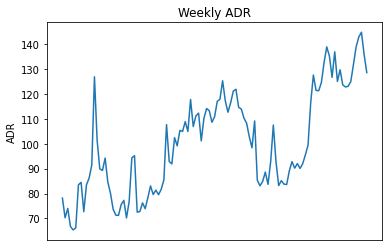

In [13]:
import matplotlib.pyplot as plt
plt.plot(tseries)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('ADR')
plt.title("Weekly ADR")
plt.show()

In [14]:
df=pd.DataFrame(tseries)
df

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201731,138.898408
201732,142.909221
201733,144.839923


In [15]:
df = df[:100]

In [16]:
df

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201716,121.461748
201717,121.316925
201718,124.661435


In [17]:
# Form dataset matrix
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [18]:
df

,ADR
FullDate,
201527,78.165879
201528,70.247336
201529,73.996534
201530,66.766446
201531,65.363578
...,...
201716,121.461748
201717,121.316925
201718,124.661435


In [19]:
# normalize dataset with MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = scaler.fit_transform(df)
df

array([[0.17394983],
       [0.06635752],
       [0.11729932],
       [0.01906132],
       [0.        ],
       [0.01126313],
       [0.24639556],
       [0.25964283],
       [0.09947309],
       [0.24576306],
       [0.28316233],
       [0.35448622],
       [0.83647103],
       [0.48979137],
       [0.33351757],
       [0.32476797],
       [0.39244271],
       [0.26195377],
       [0.20032856],
       [0.11274354],
       [0.08053814],
       [0.07934428],
       [0.13799894],
       [0.16147725],
       [0.06540364],
       [0.15557826],
       [0.39323464],
       [0.40556934],
       [0.09735725],
       [0.1002107 ],
       [0.14762734],
       [0.11598137],
       [0.1759088 ],
       [0.24035225],
       [0.19330065],
       [0.21743866],
       [0.1922823 ],
       [0.22195395],
       [0.27295638],
       [0.57536981],
       [0.37368255],
       [0.36078985],
       [0.5039237 ],
       [0.45917583],
       [0.54369246],
       [0.53801535],
       [0.59179033],
       [0.537

In [20]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# Training and Validation data partition
train_size = int(len(df) * 0.8)
val_size = len(df) - train_size
train, val = df[0:train_size,:], df[train_size:len(df),:]

# Number of previous
previous = 5
X_train, Y_train = create_dataset(train, previous)
X_val, Y_val = create_dataset(val, previous)

/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/michael/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [21]:
X_train

array([[0.17394983, 0.06635752, 0.11729932, 0.01906132, 0.        ],
       [0.06635752, 0.11729932, 0.01906132, 0.        , 0.01126313],
       [0.11729932, 0.01906132, 0.        , 0.01126313, 0.24639556],
       [0.01906132, 0.        , 0.01126313, 0.24639556, 0.25964283],
       [0.        , 0.01126313, 0.24639556, 0.25964283, 0.09947309],
       [0.01126313, 0.24639556, 0.25964283, 0.09947309, 0.24576306],
       [0.24639556, 0.25964283, 0.09947309, 0.24576306, 0.28316233],
       [0.25964283, 0.09947309, 0.24576306, 0.28316233, 0.35448622],
       [0.09947309, 0.24576306, 0.28316233, 0.35448622, 0.83647103],
       [0.24576306, 0.28316233, 0.35448622, 0.83647103, 0.48979137],
       [0.28316233, 0.35448622, 0.83647103, 0.48979137, 0.33351757],
       [0.35448622, 0.83647103, 0.48979137, 0.33351757, 0.32476797],
       [0.83647103, 0.48979137, 0.33351757, 0.32476797, 0.39244271],
       [0.48979137, 0.33351757, 0.32476797, 0.39244271, 0.26195377],
       [0.33351757, 0.32476797, 0.

In [22]:
Y_train

array([0.01126313, 0.24639556, 0.25964283, 0.09947309, 0.24576306,
       0.28316233, 0.35448622, 0.83647103, 0.48979137, 0.33351757,
       0.32476797, 0.39244271, 0.26195377, 0.20032856, 0.11274354,
       0.08053814, 0.07934428, 0.13799894, 0.16147725, 0.06540364,
       0.15557826, 0.39323464, 0.40556934, 0.09735725, 0.1002107 ,
       0.14762734, 0.11598137, 0.1759088 , 0.24035225, 0.19330065,
       0.21743866, 0.1922823 , 0.22195395, 0.27295638, 0.57536981,
       0.37368255, 0.36078985, 0.5039237 , 0.45917583, 0.54369246,
       0.53801535, 0.59179033, 0.53773102, 0.71273958, 0.56473889,
       0.62261674, 0.63795482, 0.4863144 , 0.6095559 , 0.66332211,
       0.65120655, 0.5882372 , 0.61841441, 0.70247603, 0.71387475,
       0.81488874, 0.70577535, 0.6431417 , 0.69376344, 0.75834494,
       0.76853419, 0.67014112, 0.660419  , 0.61070662, 0.58255007,
       0.50869571, 0.44843338, 0.59540446, 0.27199967, 0.24101317,
       0.26460434, 0.316027  , 0.24883798, 0.37251176])

Train on 59 samples, validate on 15 samples
Epoch 1/100
59/59 - 0s - loss: 0.1524 - val_loss: 0.1143
Epoch 2/100
59/59 - 0s - loss: 0.0653 - val_loss: 0.0373
Epoch 3/100
59/59 - 0s - loss: 0.0322 - val_loss: 0.0173
Epoch 4/100
59/59 - 0s - loss: 0.0240 - val_loss: 0.0170
Epoch 5/100
59/59 - 0s - loss: 0.0230 - val_loss: 0.0189
Epoch 6/100
59/59 - 0s - loss: 0.0223 - val_loss: 0.0172
Epoch 7/100
59/59 - 0s - loss: 0.0217 - val_loss: 0.0195
Epoch 8/100
59/59 - 0s - loss: 0.0212 - val_loss: 0.0182
Epoch 9/100
59/59 - 0s - loss: 0.0209 - val_loss: 0.0178
Epoch 10/100
59/59 - 0s - loss: 0.0203 - val_loss: 0.0192
Epoch 11/100
59/59 - 0s - loss: 0.0201 - val_loss: 0.0193
Epoch 12/100
59/59 - 0s - loss: 0.0197 - val_loss: 0.0191
Epoch 13/100
59/59 - 0s - loss: 0.0194 - val_loss: 0.0178
Epoch 14/100
59/59 - 0s - loss: 0.0196 - val_loss: 0.0168
Epoch 15/100
59/59 - 0s - loss: 0.0190 - val_loss: 0.0175
Epoch 16/100
59/59 - 0s - loss: 0.0189 - val_loss: 0.0175
Epoch 17/100
59/59 - 0s - loss: 0.018

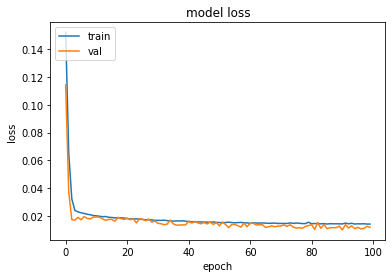

In [23]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))

# Generate LSTM network
model = tf.keras.Sequential()
model.add(LSTM(4, input_shape=(1, previous)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=1, verbose=2)


# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
# Generate predictions
trainpred = model.predict(X_train)
valpred = model.predict(X_val)

In [25]:
trainpred

array([[0.11831056],
       [0.11736467],
       [0.21587108],
       [0.23535304],
       [0.18668042],
       [0.2568487 ],
       [0.26163894],
       [0.3306265 ],
       [0.5975955 ],
       [0.448429  ],
       [0.42186004],
       [0.35592318],
       [0.39433414],
       [0.30868828],
       [0.27221477],
       [0.19847095],
       [0.16660997],
       [0.15363693],
       [0.17849946],
       [0.19383831],
       [0.15777463],
       [0.19994251],
       [0.30572462],
       [0.3432122 ],
       [0.20661384],
       [0.2063881 ],
       [0.17914402],
       [0.16878328],
       [0.20962803],
       [0.23891579],
       [0.22734727],
       [0.24698474],
       [0.2290106 ],
       [0.24804962],
       [0.2712315 ],
       [0.4471891 ],
       [0.3549332 ],
       [0.39231145],
       [0.43842572],
       [0.44855255],
       [0.51239014],
       [0.4998355 ],
       [0.56957453],
       [0.5305813 ],
       [0.66023916],
       [0.5629533 ],
       [0.6392556 ],
       [0.607

In [26]:
valpred

array([[0.27732784],
       [0.3115363 ],
       [0.3441509 ],
       [0.33936065],
       [0.36054605],
       [0.344468  ],
       [0.3665586 ],
       [0.38817728],
       [0.43001938],
       [0.57961357],
       [0.6947468 ],
       [0.70137674],
       [0.73417395],
       [0.7858948 ]], dtype=float32)

In [27]:
# Convert predictions back to normal values
trainpred = scaler.inverse_transform(trainpred)
Y_train = scaler.inverse_transform([Y_train])
valpred = scaler.inverse_transform(valpred)
Y_val = scaler.inverse_transform([Y_val])
predictions = valpred

In [28]:
Y_train.shape

(1, 74)

In [29]:
Y_val.shape

(1, 14)

In [30]:
X_train.shape

(74, 1, 5)

In [31]:
X_val.shape

(14, 1, 5)

In [32]:
Y_train

array([[ 66.19251773,  83.49771567,  84.47268398,  72.68456522,
         83.45116535,  86.20366422,  91.45293608, 126.92589397,
        101.41107955,  89.9096928 ,  89.26574257,  94.24644567,
         84.64276423,  80.10729242,  73.66123894,  71.29099688,
         71.20313158,  75.51997732,  77.24792627,  70.17713287,
         76.81377451,  94.30473002,  95.21253521,  72.52884422,
         72.73885106,  76.22860526,  73.89953608,  78.31005495,
         83.05294239,  79.5900545 ,  81.36655536,  79.51510608,
         81.69887067,  85.45253049, 107.70945313,  92.86574132,
         91.91686905, 102.45118665,  99.15784753, 105.37807425,
        104.96025199, 108.91796547, 104.93932653, 117.81954795,
        106.92704225, 111.18671756, 112.31556444, 101.15518268,
        110.22546968, 114.18253731, 113.29086053, 108.65646341,
        110.87743553, 117.06417476, 117.90309371, 125.33748775,
        117.30699725, 112.6973067 , 116.42294872, 121.17599585,
        121.92590126, 114.68440079, 113.

In [33]:
Y_val

array([[ 89.19876623,  92.82290682,  90.20431193,  92.04525896,
         90.06917483,  91.99566508,  95.53501946,  99.44500705,
        116.58657688, 127.64236479, 121.46174792, 121.31692451,
        124.66143536, 132.63951467]])

In [34]:
X_train

array([[[0.17394983, 0.06635752, 0.11729932, 0.01906132, 0.        ]],

       [[0.06635752, 0.11729932, 0.01906132, 0.        , 0.01126313]],

       [[0.11729932, 0.01906132, 0.        , 0.01126313, 0.24639556]],

       [[0.01906132, 0.        , 0.01126313, 0.24639556, 0.25964283]],

       [[0.        , 0.01126313, 0.24639556, 0.25964283, 0.09947309]],

       [[0.01126313, 0.24639556, 0.25964283, 0.09947309, 0.24576306]],

       [[0.24639556, 0.25964283, 0.09947309, 0.24576306, 0.28316233]],

       [[0.25964283, 0.09947309, 0.24576306, 0.28316233, 0.35448622]],

       [[0.09947309, 0.24576306, 0.28316233, 0.35448622, 0.83647103]],

       [[0.24576306, 0.28316233, 0.35448622, 0.83647103, 0.48979137]],

       [[0.28316233, 0.35448622, 0.83647103, 0.48979137, 0.33351757]],

       [[0.35448622, 0.83647103, 0.48979137, 0.33351757, 0.32476797]],

       [[0.83647103, 0.48979137, 0.33351757, 0.32476797, 0.39244271]],

       [[0.48979137, 0.33351757, 0.32476797, 0.39244271, 0.26195

In [35]:
X_val

array([[[0.37223323, 0.24205107, 0.2691728 , 0.24987543, 0.24818941]],

       [[0.24205107, 0.2691728 , 0.24987543, 0.24818941, 0.32385794]],

       [[0.2691728 , 0.24987543, 0.24818941, 0.32385794, 0.37310054]],

       [[0.24987543, 0.24818941, 0.32385794, 0.37310054, 0.33752068]],

       [[0.24818941, 0.32385794, 0.37310054, 0.33752068, 0.36253434]],

       [[0.32385794, 0.37310054, 0.33752068, 0.36253434, 0.33568452]],

       [[0.37310054, 0.33752068, 0.36253434, 0.33568452, 0.36186048]],

       [[0.33752068, 0.36253434, 0.33568452, 0.36186048, 0.40995106]],

       [[0.36253434, 0.33568452, 0.36186048, 0.40995106, 0.46307758]],

       [[0.33568452, 0.36186048, 0.40995106, 0.46307758, 0.69598672]],

       [[0.36186048, 0.40995106, 0.46307758, 0.69598672, 0.84620599]],

       [[0.40995106, 0.46307758, 0.69598672, 0.84620599, 0.76222756]],

       [[0.46307758, 0.69598672, 0.84620599, 0.76222756, 0.76025979]],

       [[0.69598672, 0.84620599, 0.76222756, 0.76025979, 0.80570

In [36]:
import math
from sklearn.metrics import mean_squared_error

# calculate RMSE
trainScore = math.sqrt(mean_squared_error(Y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
valScore = math.sqrt(mean_squared_error(Y_val[0], valpred[:,0]))
print('Validation Score: %.2f RMSE' % (valScore))

Train Score: 8.52 RMSE
Validation Score: 8.49 RMSE


In [37]:
# Train predictions
trainpredPlot = np.empty_like(df)
trainpredPlot[:, :] = np.nan
trainpredPlot[previous:len(trainpred)+previous, :] = trainpred

In [38]:
# Validation predictions
valpredPlot = np.empty_like(df)
valpredPlot[:, :] = np.nan
valpredPlot[len(trainpred)+(previous*2)+1:len(df)-1, :] = valpred

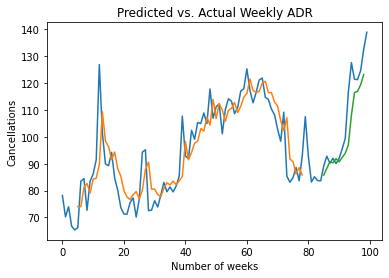

In [39]:
# Plot all predictions
inversetransform, =plt.plot(scaler.inverse_transform(df))
trainpred, =plt.plot(trainpredPlot)
valpred, =plt.plot(valpredPlot)
plt.xlabel('Number of weeks')
plt.ylabel('Cancellations')
plt.title("Predicted vs. Actual Weekly ADR")
plt.show()

In [40]:
Y_val=Y_val.reshape(-1)
Y_val.shape
Y_val=pd.Series(Y_val)

In [41]:
Y_val

0      89.198766
1      92.822907
2      90.204312
3      92.045259
4      90.069175
5      91.995665
6      95.535019
7      99.445007
8     116.586577
9     127.642365
10    121.461748
11    121.316925
12    124.661435
13    132.639515
dtype: float64

In [42]:
predictions=predictions.reshape(-1)
predictions.shape
predictions=pd.Series(predictions)

In [43]:
predictions

0      85.774261
1      88.291931
2      90.692284
3      90.339729
4      91.898926
5      90.715622
6      92.341438
7      93.932526
8      97.012009
9     108.021790
10    116.495323
11    116.983269
12    119.397064
13    123.203606
dtype: float32

In [44]:
import numpy as np

def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))

In [45]:
mda(Y_val, predictions)

0.8571428571428571

In [46]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/

from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(Y_val, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 8.490766


In [47]:
forecast_error = (predictions-Y_val)
forecast_error

0     -3.424505
1     -4.530976
2      0.487972
3     -1.705530
4      1.829751
5     -1.280043
6     -3.193581
7     -5.512481
8    -19.574568
9    -19.620575
10    -4.966425
11    -4.333656
12    -5.264371
13    -9.435909
dtype: float64

In [48]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-5.751778376463913

In [49]:
X_train

array([[[0.17394983, 0.06635752, 0.11729932, 0.01906132, 0.        ]],

       [[0.06635752, 0.11729932, 0.01906132, 0.        , 0.01126313]],

       [[0.11729932, 0.01906132, 0.        , 0.01126313, 0.24639556]],

       [[0.01906132, 0.        , 0.01126313, 0.24639556, 0.25964283]],

       [[0.        , 0.01126313, 0.24639556, 0.25964283, 0.09947309]],

       [[0.01126313, 0.24639556, 0.25964283, 0.09947309, 0.24576306]],

       [[0.24639556, 0.25964283, 0.09947309, 0.24576306, 0.28316233]],

       [[0.25964283, 0.09947309, 0.24576306, 0.28316233, 0.35448622]],

       [[0.09947309, 0.24576306, 0.28316233, 0.35448622, 0.83647103]],

       [[0.24576306, 0.28316233, 0.35448622, 0.83647103, 0.48979137]],

       [[0.28316233, 0.35448622, 0.83647103, 0.48979137, 0.33351757]],

       [[0.35448622, 0.83647103, 0.48979137, 0.33351757, 0.32476797]],

       [[0.83647103, 0.48979137, 0.33351757, 0.32476797, 0.39244271]],

       [[0.48979137, 0.33351757, 0.32476797, 0.39244271, 0.26195

In [50]:
X_train.shape

(74, 1, 5)

In [51]:
# Test (unseen) predictions
Xnew = np.array([tseries.iloc[95:100],tseries.iloc[96:101],tseries.iloc[97:102],tseries.iloc[98:103],tseries.iloc[99:104],tseries.iloc[100:105],tseries.iloc[101:106],tseries.iloc[102:107],tseries.iloc[103:108],tseries.iloc[104:109],tseries.iloc[105:110],tseries.iloc[106:111],tseries.iloc[107:112],tseries.iloc[108:113],tseries.iloc[109:114]])

In [52]:
Xnew

array([[121.46174792, 121.31692451, 124.66143536, 132.63951467,
        138.96124481],
       [121.31692451, 124.66143536, 132.63951467, 138.96124481,
        135.29018595],
       [124.66143536, 132.63951467, 138.96124481, 135.29018595,
        126.70549121],
       [132.63951467, 138.96124481, 135.29018595, 126.70549121,
        136.96731501],
       [138.96124481, 135.29018595, 126.70549121, 136.96731501,
        125.04368653],
       [135.29018595, 126.70549121, 136.96731501, 125.04368653,
        129.75435252],
       [126.70549121, 136.96731501, 125.04368653, 129.75435252,
        123.69777658],
       [136.96731501, 125.04368653, 129.75435252, 123.69777658,
        122.84483755],
       [125.04368653, 129.75435252, 123.69777658, 122.84483755,
        123.08675055],
       [129.75435252, 123.69777658, 122.84483755, 123.08675055,
        124.98114286],
       [123.69777658, 122.84483755, 123.08675055, 124.98114286,
        131.79458537],
       [122.84483755, 123.08675055, 124.981

In [53]:
Xnew = scaler.fit_transform(Xnew)
Xnew
Xnewformat = np.reshape(Xnew, (Xnew.shape[0], 1, Xnew.shape[1]))
ynew=model.predict(Xnewformat)

In [54]:
Xnew.shape

(15, 5)

In [55]:
ynew

array([[0.50005645],
       [0.47328037],
       [0.3090141 ],
       [0.5828335 ],
       [0.21284685],
       [0.42098445],
       [0.13117069],
       [0.1431401 ],
       [0.10719502],
       [0.13088046],
       [0.2996594 ],
       [0.5054479 ],
       [0.68953687],
       [0.81622225],
       [0.67822605]], dtype=float32)

In [56]:
type(ynew)

numpy.ndarray

In [57]:
ynew.shape

(15, 1)

In [58]:
actual = tseries.iloc[100:115]
actual

FullDate
201721    135.290186
201722    126.705491
201723    136.967315
201724    125.043687
201725    129.754353
201726    123.697777
201727    122.844838
201728    123.086751
201729    124.981143
201730    131.794585
201731    138.898408
201732    142.909221
201733    144.839923
201734    135.892708
201735    128.586952
Name: ADR, dtype: float64

In [59]:
actual = np.array(actual)
actual

array([135.29018595, 126.70549121, 136.96731501, 125.04368653,
       129.75435252, 123.69777658, 122.84483755, 123.08675055,
       124.98114286, 131.79458537, 138.89840845, 142.90922096,
       144.83992318, 135.89270833, 128.58695175])

In [60]:
actual=actual.reshape(15,-1)
actual.shape

(15, 1)

In [61]:
actual

array([[135.29018595],
       [126.70549121],
       [136.96731501],
       [125.04368653],
       [129.75435252],
       [123.69777658],
       [122.84483755],
       [123.08675055],
       [124.98114286],
       [131.79458537],
       [138.89840845],
       [142.90922096],
       [144.83992318],
       [135.89270833],
       [128.58695175]])

In [62]:
ynew=ynew.reshape(-1)
actual=actual.reshape(-1)
actualpd=pd.Series(actual)

In [63]:
np.min(df)

0.0

In [64]:
ynew

array([0.50005645, 0.47328037, 0.3090141 , 0.5828335 , 0.21284685,
       0.42098445, 0.13117069, 0.1431401 , 0.10719502, 0.13088046,
       0.2996594 , 0.5054479 , 0.68953687, 0.81622225, 0.67822605],
      dtype=float32)

In [65]:
maxt=np.max(tseries)

In [66]:
mint=np.min(tseries)

In [67]:
ynew = ynew * np.abs(maxt-mint) + np.min(tseries)
ynewpd=pd.Series(ynew)

In [68]:
actualpd

0     135.290186
1     126.705491
2     136.967315
3     125.043687
4     129.754353
5     123.697777
6     122.844838
7     123.086751
8     124.981143
9     131.794585
10    138.898408
11    142.909221
12    144.839923
13    135.892708
14    128.586952
dtype: float64

In [69]:
ynewpd

0     105.106239
1     102.978180
2      89.922890
3     111.685059
4      82.279869
5      98.821884
6      75.788544
7      76.739830
8      73.883049
9      75.765480
10     89.179413
11    105.534729
12    120.165451
13    130.233948
14    119.266510
dtype: float32

In [70]:
mda(actualpd, ynewpd)

0.8666666666666667

In [71]:
mse = mean_squared_error(actualpd, ynewpd)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 37.813123


In [72]:
forecast_error = (ynewpd-actualpd)
forecast_error

0    -30.183947
1    -23.727311
2    -47.044425
3    -13.358628
4    -47.474483
5    -24.875892
6    -47.056294
7    -46.346921
8    -51.098094
9    -56.029105
10   -49.718996
11   -37.374492
12   -24.674472
13    -5.658761
14    -9.320442
dtype: float64

In [73]:
mean_forecast_error = np.mean(forecast_error)
mean_forecast_error

-34.26281750539097

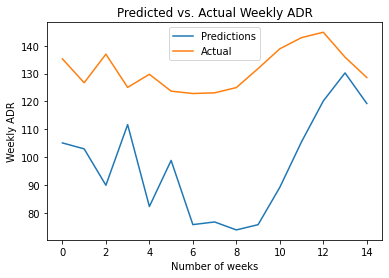

In [74]:
predictons, =plt.plot(ynewpd, label='Predictions')
actual, =plt.plot(actualpd, label='Actual')
plt.xlabel('Number of weeks')
plt.ylabel('Weekly ADR')
plt.title("Predicted vs. Actual Weekly ADR")
plt.legend(loc = 'upper center')
plt.show()

In [75]:
np.mean(actualpd)

131.41955578664096